In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [139]:
sns.set(style="darkgrid")
sns.set_context("talk")

In [140]:
dfadvanced = pd.read_csv('dataset/Advanced.csv')
dftstats = pd.read_csv('dataset/Team Stats Per Game.csv')
dfts = pd.read_csv('dataset/Team Summaries.csv')
dftt = pd.read_csv('dataset/Team Totals.csv')
dfpt = pd.read_csv('dataset/Player Totals.csv')

In [141]:
dfadvanced.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,5.5,15.2,0.7,0.3,1.1,0.084,-0.4,-1.7,-2.1,0.0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,9.6,20.0,0.0,0.3,0.2,0.036,-3.1,-1.5,-4.6,-0.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,11.3,17.3,-0.4,0.0,-0.4,-0.120,-6.0,-3.5,-9.6,-0.3
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,11.2,17.8,4.5,2.6,7.1,0.148,1.2,0.1,1.3,1.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,10.6,16.7,1.3,1.2,2.5,0.094,-1.8,0.3,-1.5,0.2


In [142]:
dftstats.head()

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,NBA,Atlanta Hawks,ATL,False,82.0,242.1,43.0,92.5,0.465,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,2024,NBA,Boston Celtics,BOS,True,82.0,241.8,43.9,90.2,0.487,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,NBA,Brooklyn Nets,BRK,False,82.0,241.5,40.7,89.1,0.456,...,0.756,11.4,32.6,44.1,25.6,6.8,5.2,13.1,18.5,110.4
3,2024,NBA,Chicago Bulls,CHI,False,82.0,243.7,42.0,89.5,0.470,...,0.791,11.2,32.6,43.8,25.0,7.8,4.8,12.2,18.8,112.3
4,2024,NBA,Charlotte Hornets,CHO,False,82.0,240.6,40.0,87.0,0.460,...,0.786,9.3,31.0,40.3,24.8,6.9,4.5,13.8,18.0,106.6


In [143]:
dfts.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,...,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,...,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,...,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,...,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,...,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [144]:
dftt.head()

,season,lg,team,abbreviation,playoffs,g,mp,fg,fga,fg_percent,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2024,NBA,Atlanta Hawks,ATL,False,82.0,19855.0,3529.0,7584.0,0.465,...,0.797,1024.0,2639.0,3663.0,2180.0,615.0,369.0,1110.0,1522.0,9703.0
1,2024,NBA,Boston Celtics,BOS,True,82.0,19830.0,3601.0,7396.0,0.487,...,0.807,876.0,2923.0,3799.0,2207.0,557.0,538.0,979.0,1326.0,9887.0
2,2024,NBA,Brooklyn Nets,BRK,False,82.0,19805.0,3334.0,7307.0,0.456,...,0.756,938.0,2675.0,3613.0,2102.0,556.0,424.0,1076.0,1516.0,9050.0
3,2024,NBA,Chicago Bulls,CHI,False,82.0,19980.0,3448.0,7339.0,0.470,...,0.791,916.0,2677.0,3593.0,2048.0,638.0,394.0,1004.0,1541.0,9206.0
4,2024,NBA,Charlotte Hornets,CHO,False,82.0,19730.0,3281.0,7133.0,0.460,...,0.786,765.0,2538.0,3303.0,2033.0,562.0,371.0,1129.0,1472.0,8740.0


In [145]:
print("Advanced",dfadvanced.shape)
print("Team Stats",dftstats.shape)
print("Team Summary",dfts.shape)
print("Team Totals",dftt.shape)

Advanced (31870, 32)
Team Stats (1845, 28)
Team Summary (1845, 31)
Team Totals (1845, 28)


In [146]:
print("Advanced")
print(dfadvanced.isna().sum())
print()
print("Team Stats")
print(dftstats.isna().sum())
print()
print("Team Summary")
print(dfts.isna().sum())
print()
print("Team Totals")
print(dftt.isna().sum())
            

Advanced
seas_id            0
season             0
player_id          0
player             0
birth_year     29000
pos                0
age               22
experience         0
lg                 0
tm                 0
g                  0
mp              1083
per             1100
ts_percent       136
x3p_ar          6490
f_tr             157
orb_percent     5298
drb_percent     5298
trb_percent     3709
ast_percent     2725
stl_percent     5641
blk_percent     5640
tov_percent     5737
usg_percent     5640
ows               11
dws               11
ws                11
ws_48           1100
obpm            5647
dbpm            5647
bpm             5647
vorp            5647
dtype: int64

Team Stats
season             0
lg                 0
team               0
abbreviation      87
playoffs           0
g                  1
mp_per_game      190
fg_per_game        1
fga_per_game       1
fg_percent         1
x3p_per_game     443
x3pa_per_game    443
x3p_percent      443
x2p_per_game       1


In [147]:
print("Unique seasons in data:", dfadvanced['season'].unique())

Unique seasons in data: [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011
 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997
 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983
 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969
 1968 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955
 1954 1953 1952 1951 1950 1949 1948 1947]


In [148]:
players_with_experience = dfadvanced[dfadvanced['experience'] >= 7]

In [149]:
players_with_experience.nunique()

seas_id        9405
season           72
player_id      1549
player         1544
birth_year       44
pos              23
age              21
experience       16
lg                2
tm               80
g                87
mp             3015
per             393
ts_percent      513
x3p_ar          813
f_tr            786
orb_percent     230
drb_percent     366
trb_percent     261
ast_percent     482
stl_percent      69
blk_percent     103
tov_percent     355
usg_percent     338
ows             159
dws              94
ws              193
ws_48           522
obpm            263
dbpm            144
bpm             312
vorp            120
dtype: int64

In [150]:
players_with_experience['age'].isna().sum()

0

In [151]:
print("Unique seasons in data:", players_with_experience['season'].unique())

Unique seasons in data: [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011
 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997
 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983
 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969
 1968 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955
 1954 1953]


Making Sure that we have the data for players having more than 7 years of experience

In [152]:
player_years = players_with_experience.groupby('player')['season'].agg(['min', 'max', 'nunique'])
player_years['expected_seasons'] = player_years['max'] - player_years['min'] + 1
player_years['has_complete_data'] = player_years['nunique'] == player_years['expected_seasons']
complete_data_players = player_years[player_years['has_complete_data']]
complete_playerdata_df = dfadvanced[dfadvanced['player'].isin(complete_data_players.index)]

In [153]:
complete_playerdata_df.nunique()

seas_id        18248
season            78
player_id       1409
player          1391
birth_year        45
pos               24
age               26
experience        22
lg                 3
tm                97
g                 89
mp              3330
per              431
ts_percent       543
x3p_ar           822
f_tr             864
orb_percent      239
drb_percent      368
trb_percent      275
ast_percent      504
stl_percent       81
blk_percent      114
tov_percent      363
usg_percent      360
ows              186
dws              105
ws               219
ws_48            580
obpm             272
dbpm             164
bpm              328
vorp             122
dtype: int64

In [154]:
complete_playerdata_df[complete_playerdata_df['orb_percent'].isna()]

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
26226,5224,1973,863,Archie Clark,NaN,PG,31.0,7,NBA,BAL,...,NaN,NaN,3.6,2.0,5.6,0.181,NaN,NaN,NaN,NaN
26227,5225,1973,900,Art Williams,1939.0,PG,33.0,6,NBA,BOS,...,NaN,NaN,0.2,2.6,2.8,0.138,NaN,NaN,NaN,NaN
26232,5230,1973,1339,Austin Carr,NaN,SG,24.0,2,NBA,CLE,...,NaN,NaN,2.9,2.9,5.9,0.091,NaN,NaN,NaN,NaN
26233,5231,1973,840,Barry Clemens,NaN,SF,29.0,8,NBA,CLE,...,NaN,NaN,2.2,1.3,3.5,0.150,NaN,NaN,NaN,NaN
26235,5233,1973,905,Bill Bradley,1943.0,SF,29.0,6,NBA,NYK,...,NaN,NaN,2.9,4.1,7.0,0.112,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31752,87,1947,71,George Senesky,1922.0,PG,24.0,1,BAA,PHW,...,NaN,NaN,0.7,1.6,2.3,NaN,NaN,NaN,NaN,NaN
31784,119,1947,99,Joe Fulks,1921.0,PF,25.0,1,BAA,PHW,...,NaN,NaN,13.0,3.3,16.3,NaN,NaN,NaN,NaN,NaN
31789,124,1947,104,John Mahnken,1922.0,C,24.0,1,BAA,WSC,...,NaN,NaN,-0.5,4.8,4.4,NaN,NaN,NaN,NaN,NaN
31812,147,1947,119,Matt Guokas,1915.0,F,31.0,1,BAA,PHW,...,NaN,NaN,0.4,0.8,1.1,NaN,NaN,NaN,NaN,NaN


In [155]:
complete_playerdata_df['lg'].value_counts()

lg
NBA    17636
ABA      568
BAA       44
Name: count, dtype: int64

Removing Records for players not in NBA

In [156]:
complete_NBA_playerdata_df = complete_playerdata_df[~complete_playerdata_df['lg'].isin(['ABA', 'BAA'])]

In [157]:
complete_NBA_playerdata_df['lg'].value_counts()

lg
NBA    17636
Name: count, dtype: int64

We again check the data if we have any inconsistent player data

In [158]:
player_record_counts = complete_NBA_playerdata_df.groupby('player').size()
players_fewer_than_7 = player_record_counts[player_record_counts < 7]
print(players_fewer_than_7)

player
Bill Melchionni    2
Bob Davies         6
Brian Taylor       6
Byron Beck         1
Chuck Williams     4
Darnell Hillman    6
Dave Twardzik      4
Donnie Freeman     1
Ed Manning         6
Fatty Taylor       1
Freddie Lewis      5
George Carter      1
George Lehmann     2
George Mikan       6
George Senesky     5
Jackie Moreland    5
James Silas        6
Jim Ard            6
Jim Eakins         4
Jim Pollard        6
Jimmy Jones        3
Joe Fulks          5
John Roche         4
Johnny Neumann     4
Larry Jones        2
Les Hunter         1
Louie Dampier      3
Mike Green         6
Neil Johnson       4
Rich Jones         1
Roger Brown        4
Steve Jones        1
Ted McClain        5
Tim Bassett        6
Tom Thacker        4
Wil Jones          2
Willie Wise        2
dtype: int64


In [159]:
cleaned_complete_NBA_playerdata_df = complete_NBA_playerdata_df[~complete_NBA_playerdata_df['player'].isin(players_fewer_than_7.index)]

In [160]:
player_record_counts_cleaned = cleaned_complete_NBA_playerdata_df.groupby('player').size()
players_fewer_than_7_cleaned = player_record_counts_cleaned[player_record_counts_cleaned < 7]
print(players_fewer_than_7_cleaned)

Series([], dtype: int64)


In [161]:
cleaned_complete_NBA_playerdata_df.fillna(0,inplace = True)

In [162]:
cleaned_complete_NBA_playerdata_df.isna().sum()

seas_id        0
season         0
player_id      0
player         0
birth_year     0
pos            0
age            0
experience     0
lg             0
tm             0
g              0
mp             0
per            0
ts_percent     0
x3p_ar         0
f_tr           0
orb_percent    0
drb_percent    0
trb_percent    0
ast_percent    0
stl_percent    0
blk_percent    0
tov_percent    0
usg_percent    0
ows            0
dws            0
ws             0
ws_48          0
obpm           0
dbpm           0
bpm            0
vorp           0
dtype: int64

In [163]:
cleaned_complete_NBA_playerdata_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
3,31139,2024,4219,Aaron Gordon,0.0,PF,28.0,10,NBA,DEN,...,11.2,17.8,4.5,2.6,7.1,0.148,1.2,0.1,1.3,1.9
10,31146,2024,3734,Al Horford,0.0,C,37.0,17,NBA,BOS,...,10.0,12.0,3.5,2.7,6.2,0.172,1.7,2.0,3.6,2.5
11,31147,2024,3982,Alec Burks,0.0,SG,32.0,13,NBA,TOT,...,7.0,24.4,0.7,0.7,1.4,0.054,-0.3,-2.0,-2.3,-0.1
12,31148,2024,3982,Alec Burks,0.0,SG,32.0,13,NBA,DET,...,6.4,23.5,1.3,0.4,1.7,0.092,1.3,-1.7,-0.4,0.4
13,31149,2024,3982,Alec Burks,0.0,SG,32.0,13,NBA,NYK,...,8.3,26.9,-0.6,0.3,-0.4,-0.055,-4.9,-3.0,-7.8,-0.5


In [164]:
cleaned_complete_NBA_playerdata_df['player_season'] = cleaned_complete_NBA_playerdata_df['player'] + '_' + cleaned_complete_NBA_playerdata_df['season'].astype(str)
dfpt['player_season'] = dfpt['player'] + '_' + dfpt['season'].astype(str)


In [165]:
filtered_dfpt = dfpt[dfpt['player_season'].isin(cleaned_complete_NBA_playerdata_df['player_season'])]

In [166]:
filtered_dfpt.drop(columns=['player_season'], inplace=True)
cleaned_complete_NBA_playerdata_df.drop(columns=['player_season'], inplace=True)

In [167]:
print(filtered_dfpt.head())

    seas_id  season  player_id        player  birth_year pos   age  \
3     31139    2024       4219  Aaron Gordon         NaN  PF  28.0   
10    31146    2024       3734    Al Horford         NaN   C  37.0   
11    31147    2024       3982    Alec Burks         NaN  SG  32.0   
12    31148    2024       3982    Alec Burks         NaN  SG  32.0   
13    31149    2024       3982    Alec Burks         NaN  SG  32.0   

    experience   lg   tm  ...  ft_percent    orb    drb    trb  ast   stl  \
3           10  NBA  DEN  ...       0.658  174.0  297.0  471.0  259  56.0   
10          17  NBA  BOS  ...       0.867   82.0  331.0  413.0  168  38.0   
11          13  NBA  TOT  ...       0.868   24.0  126.0  150.0   88  28.0   
12          13  NBA  DET  ...       0.903   16.0   94.0  110.0   68  21.0   
13          13  NBA  NYK  ...       0.727    8.0   32.0   40.0   20   7.0   

     blk    tov   pf   pts  
3   45.0  105.0  142  1013  
10  62.0   48.0   93   562  
11  12.0   48.0   75   689  


In [168]:
print(filtered_dfpt.shape)

(17503, 35)


In [169]:
dfpt.shape

(31870, 36)

In [170]:
cleaned_complete_NBA_playerdata_df.shape

(17496, 32)

In [171]:
filtered_dfpt['points_per_game'] = filtered_dfpt['pts'] / filtered_dfpt['g']
filtered_dfpt['rebounds_per_game'] = filtered_dfpt['trb'] / filtered_dfpt['g']
filtered_dfpt['assists_per_game'] = filtered_dfpt['ast'] / filtered_dfpt['g']
filtered_dfpt['steal_per_game'] = filtered_dfpt['stl'] / filtered_dfpt['g']
filtered_dfpt['blocks_per_game'] = filtered_dfpt['blk'] / filtered_dfpt['g']
filtered_dfpt['turnover_per_game'] = filtered_dfpt['tov'] / filtered_dfpt['g']


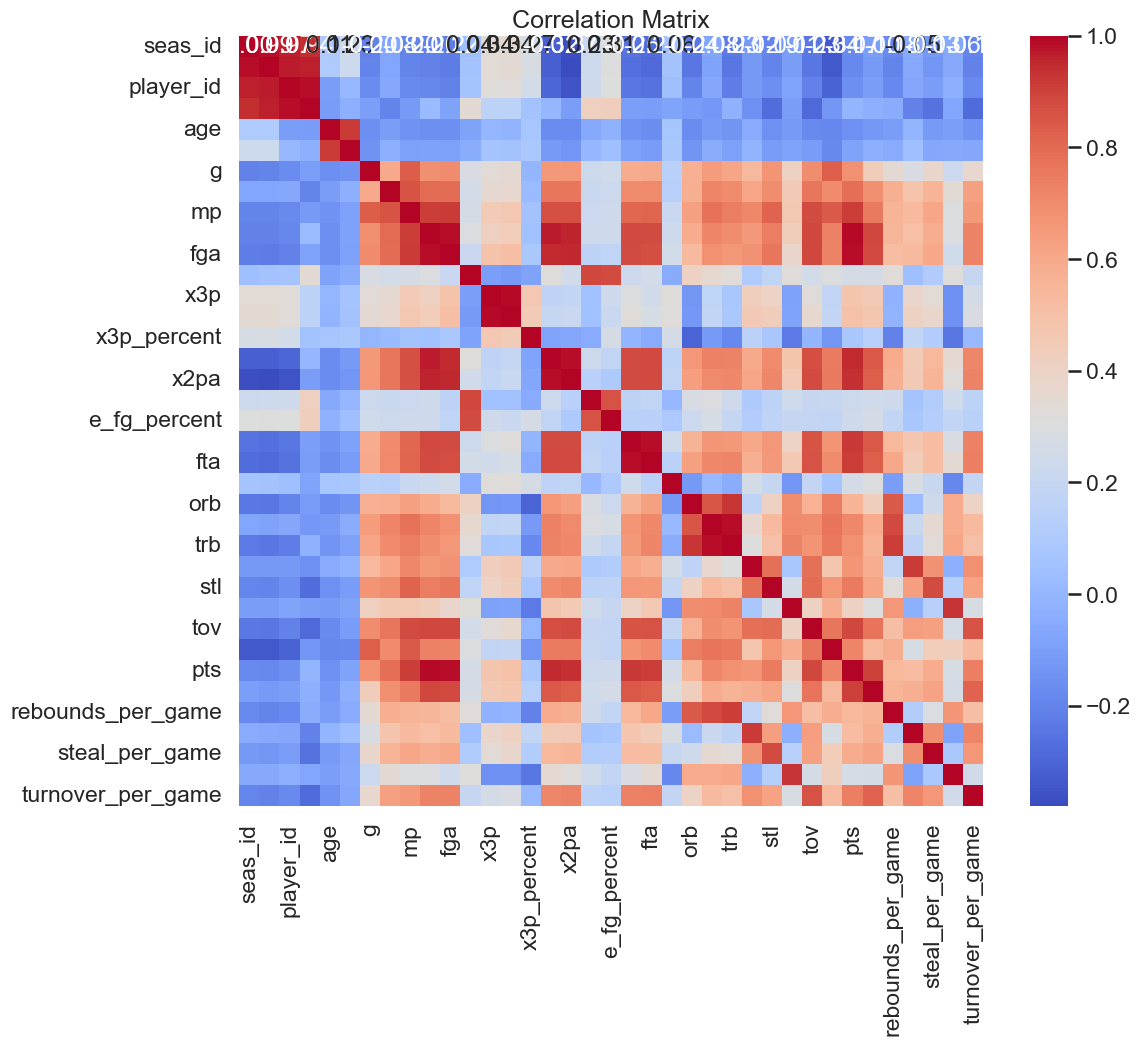

In [172]:
numeric_df = filtered_dfpt.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [173]:
filtered_dfpt['primary_pos'] = filtered_dfpt['pos'].str.split('-').str[0]

In [174]:
filtered_dfpt['primary_pos'] = filtered_dfpt['primary_pos'].replace({'F': 'PF', 'G': 'SG'})

In [175]:
print(filtered_dfpt['primary_pos'].value_counts())

primary_pos
C     3720
PF    3706
PG    3407
SG    3402
SF    3268
Name: count, dtype: int64


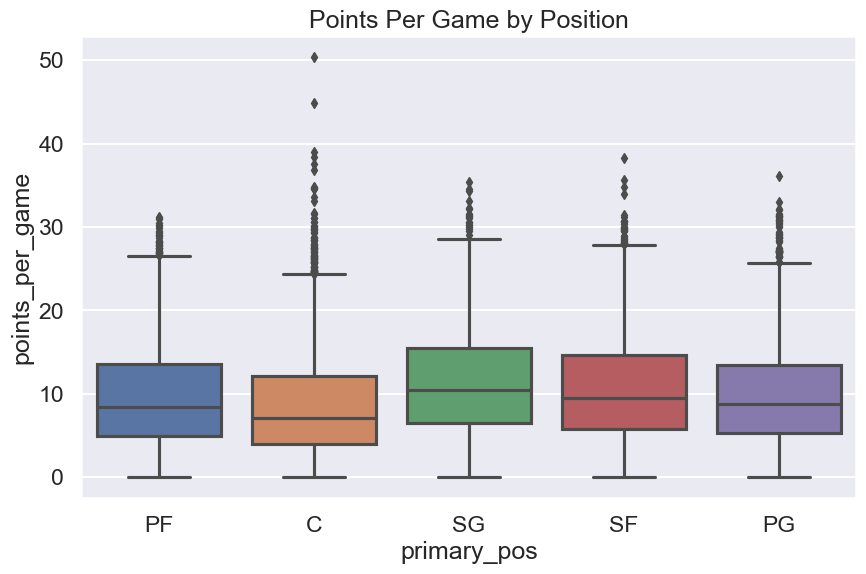

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_pos', y='points_per_game', data=filtered_dfpt)
plt.title('Points Per Game by Position')
plt.show()

In [177]:
from scipy import stats

# Define the groups by player positions
grouppg = filtered_dfpt[filtered_dfpt['primary_pos'] == 'PG'][['points_per_game','ft_percent','rebounds_per_game','assists_per_game','steal_per_game','blocks_per_game','turnover_per_game']]
groupsg = filtered_dfpt[filtered_dfpt['primary_pos'] == 'SG'][['points_per_game','ft_percent','rebounds_per_game','assists_per_game','steal_per_game','blocks_per_game','turnover_per_game']]
grouppf = filtered_dfpt[filtered_dfpt['primary_pos'] == 'PF'][['points_per_game','ft_percent','rebounds_per_game','assists_per_game','steal_per_game','blocks_per_game','turnover_per_game']]
groupsf = filtered_dfpt[filtered_dfpt['primary_pos'] == 'SF'][['points_per_game','ft_percent','rebounds_per_game','assists_per_game','steal_per_game','blocks_per_game','turnover_per_game']]
groupc = filtered_dfpt[filtered_dfpt['primary_pos'] == 'C'][['points_per_game','ft_percent','rebounds_per_game','assists_per_game','steal_per_game','blocks_per_game','turnover_per_game']]


In [178]:
# Function to calculate statistics for each column in the DataFrame
def calculate_stats(group, position):
    print(f"{position} Statistics:")
    for column in group.columns:
        mean_val = group[column].mean()
        median_val = group[column].median()
        std_dev = group[column].std()
        count = group[column].count()

        print(f"{column} - Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std Dev: {std_dev:.2f}, Count: {count}")
    print("\n")

# Calculate and display statistics for each group
calculate_stats(grouppg, "Point Guards (PG)")
calculate_stats(groupsg, "Shooting Guards (SG)")
calculate_stats(grouppf, "Power Forwards (PF)")
calculate_stats(groupsf, "Small Forwards (SF)")
calculate_stats(groupc, "Centers (C)")


Point Guards (PG) Statistics:
points_per_game - Mean: 9.91, Median: 8.79, Std Dev: 5.94, Count: 3407
ft_percent - Mean: 0.78, Median: 0.80, Std Dev: 0.10, Count: 3341
rebounds_per_game - Mean: 2.57, Median: 2.40, Std Dev: 1.40, Count: 3404
assists_per_game - Mean: 4.33, Median: 3.93, Std Dev: 2.42, Count: 3407
steal_per_game - Mean: 1.00, Median: 0.90, Std Dev: 0.55, Count: 3052
blocks_per_game - Mean: 0.16, Median: 0.12, Std Dev: 0.15, Count: 3052
turnover_per_game - Mean: 1.71, Median: 1.59, Std Dev: 0.89, Count: 2943


Shooting Guards (SG) Statistics:
points_per_game - Mean: 11.33, Median: 10.44, Std Dev: 6.26, Count: 3402
ft_percent - Mean: 0.79, Median: 0.80, Std Dev: 0.10, Count: 3346
rebounds_per_game - Mean: 2.87, Median: 2.72, Std Dev: 1.41, Count: 3394
assists_per_game - Mean: 2.51, Median: 2.22, Std Dev: 1.51, Count: 3402
steal_per_game - Mean: 0.88, Median: 0.82, Std Dev: 0.47, Count: 3005
blocks_per_game - Mean: 0.24, Median: 0.20, Std Dev: 0.20, Count: 3005
turnover_per_g

In [179]:
filtered_dfpt.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'points_per_game',
       'rebounds_per_game', 'assists_per_game', 'steal_per_game',
       'blocks_per_game', 'turnover_per_game', 'primary_pos'],
      dtype='object')

In [180]:
cleaned_complete_NBA_playerdata_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar',
       'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp'],
      dtype='object')

In [181]:
merged_player_df = pd.merge(cleaned_complete_NBA_playerdata_df[['player', 'season', 'usg_percent']],
                            filtered_dfpt, 
                            on=['player', 'season'], 
                            how='inner')
print("Shape of the merged DataFrame:", merged_player_df.shape)

Shape of the merged DataFrame: (26711, 43)


In [182]:
merged_player_df.shape

(26711, 43)

In [183]:
cleaned_complete_NBA_playerdata_df.shape

(17496, 32)

In [184]:
# Check the shape of the merged DataFrame to understand the number of rows and columns
print("Shape of the merged DataFrame:", merged_player_df.shape)

# Optionally, check for the presence of NaN values which could indicate unmatched data from `filtered_dfpt`
print("NaN counts in merged DataFrame columns:")
print(merged_player_df.isnull().sum())


Shape of the merged DataFrame: (26711, 43)
NaN counts in merged DataFrame columns:
player                   0
season                   0
usg_percent              0
seas_id                  0
player_id                0
birth_year           25285
pos                      0
age                      0
experience               0
lg                       0
tm                       0
g                        0
gs                    5123
mp                      89
fg                       0
fga                      0
fg_percent              76
x3p                   4536
x3pa                  4536
x3p_percent           7657
x2p                      0
x2pa                     0
x2p_percent            109
e_fg_percent            76
ft                       0
fta                      0
ft_percent             681
orb                   2888
drb                   2888
trb                     47
ast                      0
stl                   2892
blk                   2892
tov                   3914

In [185]:
player_counts = merged_player_df['player'].value_counts()
players_less_than_7 = player_counts[player_counts < 7]
num_players_less_than_7 = players_less_than_7.count()

In [186]:
print("Number of players appearing less than 7 times:", num_players_less_than_7)

Number of players appearing less than 7 times: 0


In [187]:
merged_player_df.to_csv("merged_NBA_player_data.csv", index=False)

In [188]:
filtered_merged_player_df = merged_player_df[merged_player_df['lg'] != 'ABA']

In [189]:
player_counts = filtered_merged_player_df['player'].value_counts()
players_less_than_7 = player_counts[player_counts < 7]
num_players_less_than_7 = players_less_than_7.count()
print("Number of players appearing less than 7 times:", num_players_less_than_7)

Number of players appearing less than 7 times: 0


merged_player_df has the modified Player Records

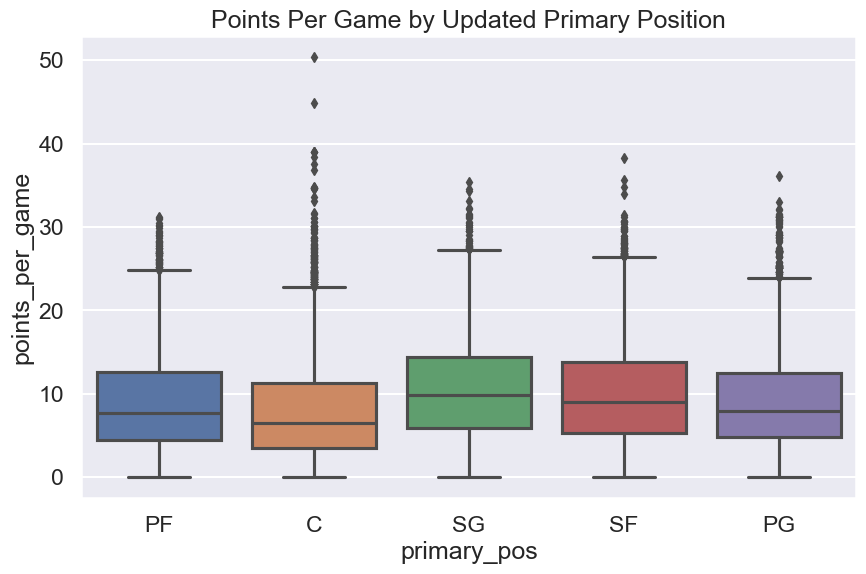

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_pos', y='points_per_game', data=merged_player_df)
plt.title('Points Per Game by Updated Primary Position')
plt.show()

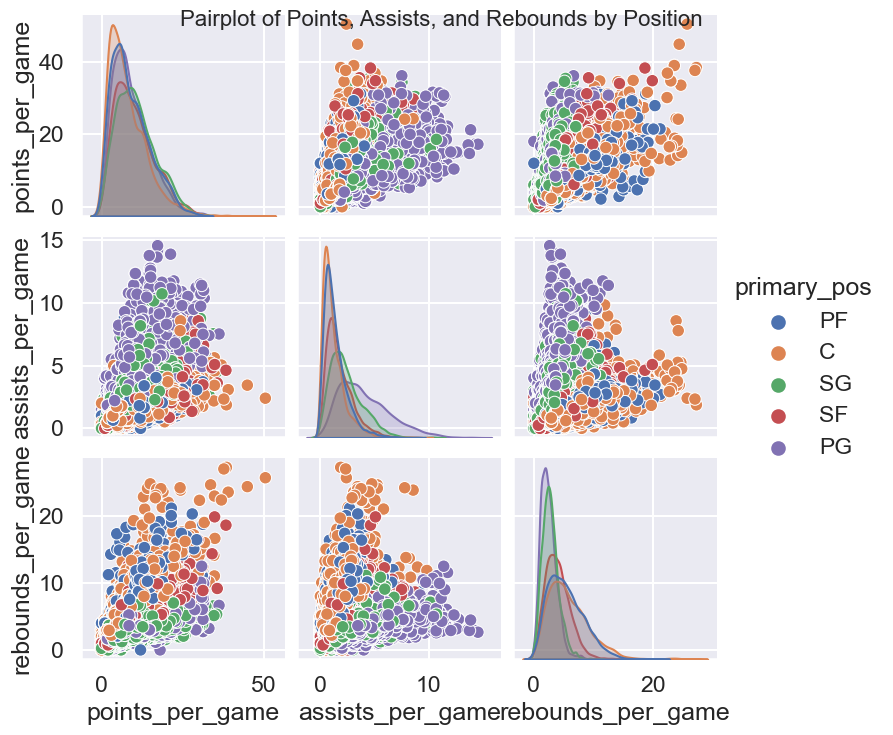

In [191]:

sns.pairplot(merged_player_df[['points_per_game', 'assists_per_game', 'rebounds_per_game', 'primary_pos']], hue='primary_pos')
plt.suptitle('Pairplot of Points, Assists, and Rebounds by Position', size=16)
plt.show()


In [192]:
merged_player_df['season'] = pd.to_datetime(merged_player_df['season'], format='%Y', errors='coerce')
avg_points_by_position_and_season = merged_player_df.groupby([merged_player_df['season'].dt.year, 'primary_pos'])['points_per_game'].mean().unstack()
print(merged_player_df['season'].dtype)
print(avg_points_by_position_and_season.head())

datetime64[ns]
primary_pos          C         PF         PG         SF         SG
season                                                            
1950          6.433612  11.867946   8.554438  10.470588  11.786126
1951          7.767023  11.872125  12.430785  11.694505  10.567476
1952         10.895374   8.670677  11.048611  16.969697  11.311973
1953         12.504746  10.227207  11.775457   9.455203  11.489892
1954         11.073773   7.849547   9.396241   8.484623  11.246939


<Figure size 2000x1200 with 0 Axes>

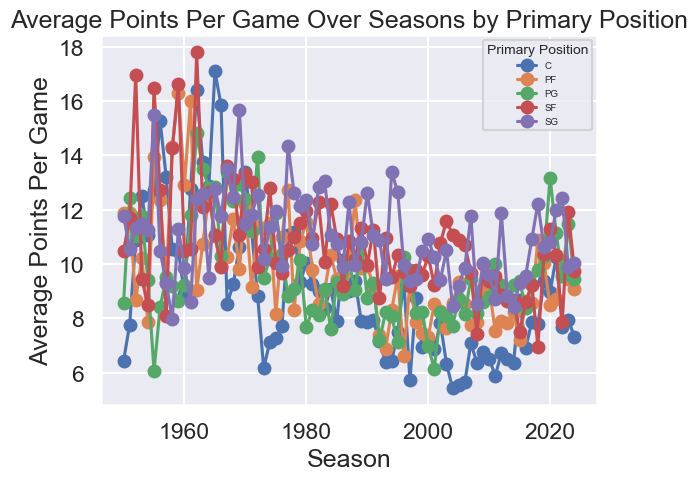

In [193]:
plt.figure(figsize=(20, 12))
avg_points_by_position_and_season.plot(kind='line', marker='o')
plt.title('Average Points Per Game Over Seasons by Primary Position')
plt.xlabel('Season')
plt.ylabel('Average Points Per Game')
plt.grid(True)
plt.legend(title='Primary Position', loc='upper right', fontsize='7', title_fontsize='10')
plt.show()


In [194]:
print(dftstats['season'].values)

[2024 2024 2024 ... 1947 1947 1947]


In [195]:
# Merge the dataframes on 'season' and 'team'
merged_team_stats = pd.merge(dftstats, dfts, on=['season', 'team'], how='inner')


In [196]:
print(merged_team_stats.columns)

Index(['season', 'lg_x', 'team', 'abbreviation_x', 'playoffs_x', 'g',
       'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent', 'ft_per_game', 'fta_per_game',
       'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pf_per_game', 'pts_per_game', 'lg_y', 'abbreviation_y', 'playoffs_y',
       'age', 'w', 'l', 'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg',
       'n_rtg', 'pace', 'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent',
       'tov_percent', 'orb_percent', 'ft_fga', 'opp_e_fg_percent',
       'opp_tov_percent', 'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend',
       'attend_g'],
      dtype='object')


merged_team_stats as Final Team Summaries

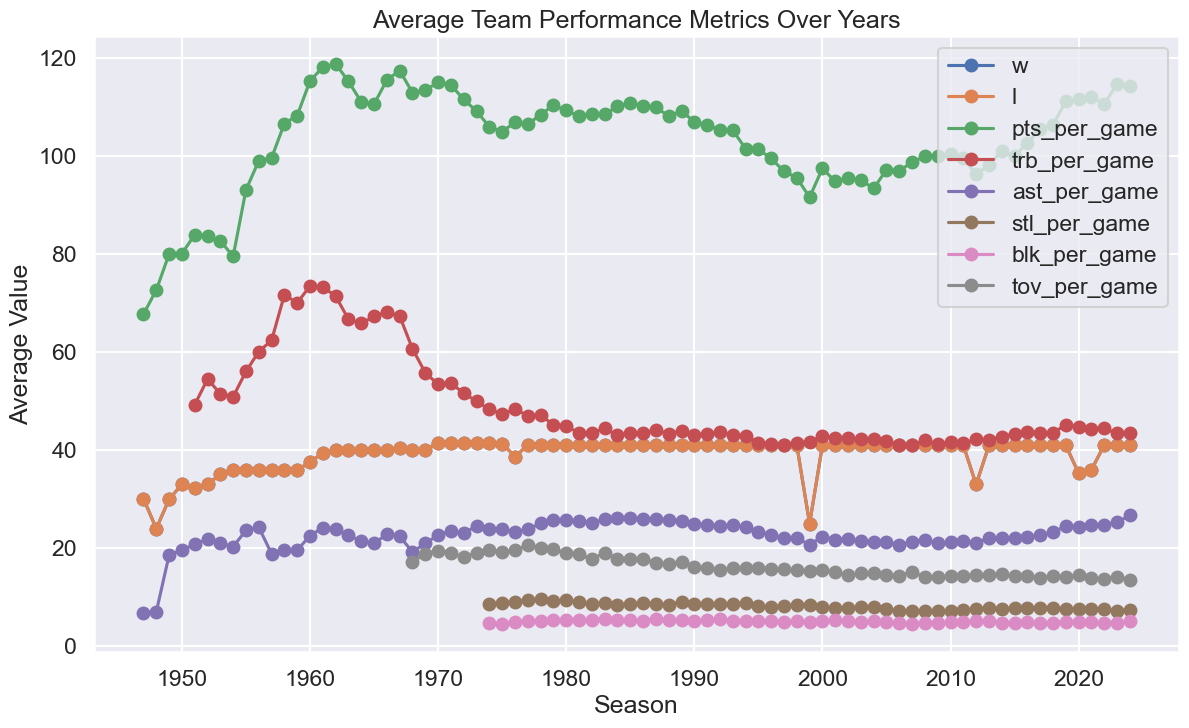

In [197]:
merged_team_stats['season'] = pd.to_datetime(merged_team_stats['season'], format='%Y')
team_performance = merged_team_stats.groupby(merged_team_stats['season'].dt.year).agg({
    'w': 'mean',
    'l' : 'mean',
    'pts_per_game': 'mean',
    'trb_per_game': 'mean',
    'ast_per_game': 'mean',
    'stl_per_game': 'mean',
    'blk_per_game': 'mean',
    'tov_per_game': 'mean'
}).plot(figsize=(14, 8), marker='o', title='Average Team Performance Metrics Over Years')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

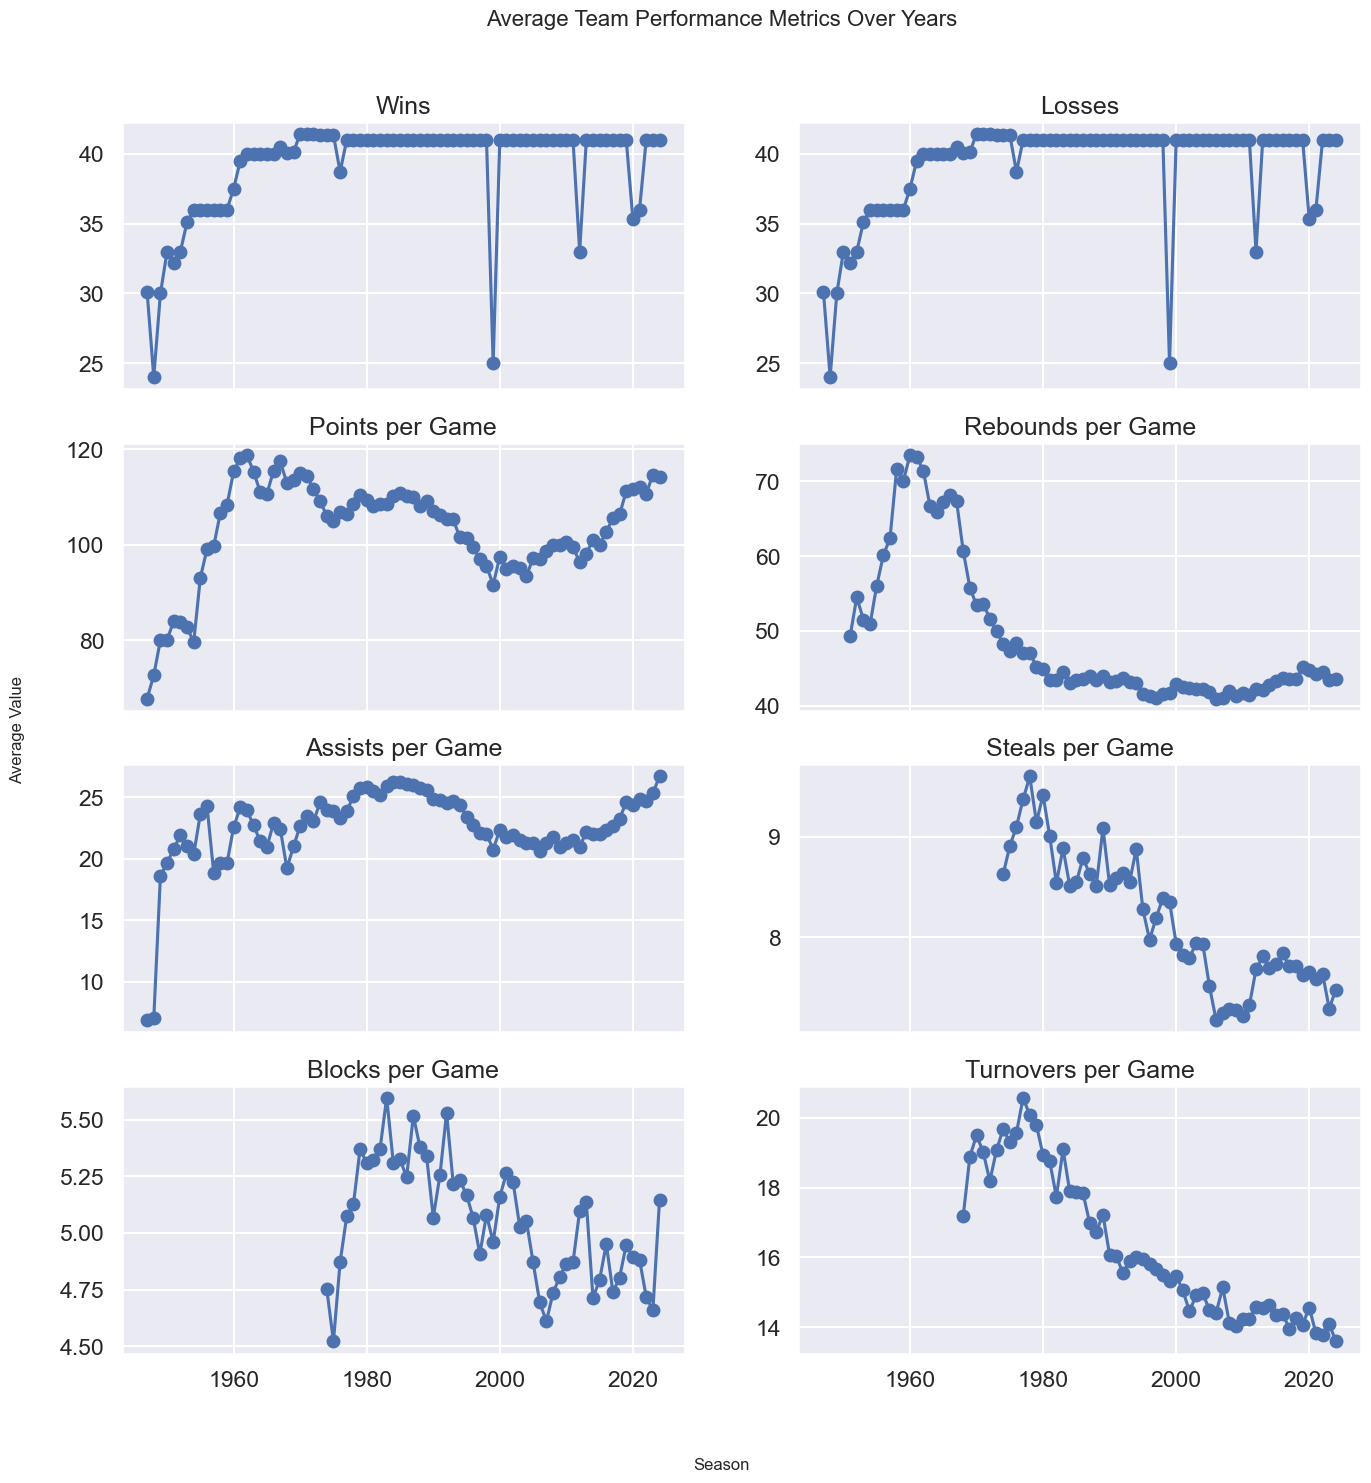

In [198]:
merged_team_stats['season'] = pd.to_datetime(merged_team_stats['season'], format='%Y')

# Grouping data by season and calculating mean for each metric
team_performance = merged_team_stats.groupby(merged_team_stats['season'].dt.year).agg({
    'w': 'mean',
    'l': 'mean',
    'pts_per_game': 'mean',
    'trb_per_game': 'mean',
    'ast_per_game': 'mean',
    'stl_per_game': 'mean',
    'blk_per_game': 'mean',
    'tov_per_game': 'mean'
})

# Plotting each metric in a separate subplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16), sharex=True)
metrics = ['w', 'l', 'pts_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game']
titles = ['Wins', 'Losses', 'Points per Game', 'Rebounds per Game', 'Assists per Game', 'Steals per Game', 'Blocks per Game', 'Turnovers per Game']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    ax.plot(team_performance.index, team_performance[metric], marker='o', linestyle='-')
    ax.set_title(title)
    ax.grid(True)

# Setting common labels
fig.text(0.5, 0.04, 'Season', ha='center', va='center', fontsize=12)
fig.text(0.06, 0.5, 'Average Value', ha='center', va='center', rotation='vertical', fontsize=12)

plt.suptitle('Average Team Performance Metrics Over Years', fontsize=16, y=0.95)
plt.show()

In [199]:
print(merged_team_stats['season'].values)

['2024-01-01T00:00:00.000000000' '2024-01-01T00:00:00.000000000'
 '2024-01-01T00:00:00.000000000' ... '1947-01-01T00:00:00.000000000'
 '1947-01-01T00:00:00.000000000' '1947-01-01T00:00:00.000000000']
